## About the project

## Workflow

Image data => Data Preprocessing => Test Train Split => CNN training => Model Evaluation => Streamlit Web App => Dockerfile => Docker Image => Docker Container

## Code

### Data and Pre-processing

In [1]:
# Setting the seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Load and prepare the Fashion MINST dataset
fashiion_minst = datasets.fashion_mnist # this contains 2 tuples. One for the test another one is for training
(train_images, train_labels), (test_images, test_labels) = fashiion_minst.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_images))
print(len(train_labels))

60000
60000


So All images are lebeled.

In [7]:
print(test_images[0].shape)

(28, 28)


So the iamge are grayscaled. and dimention of 28 x 28.

In [8]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

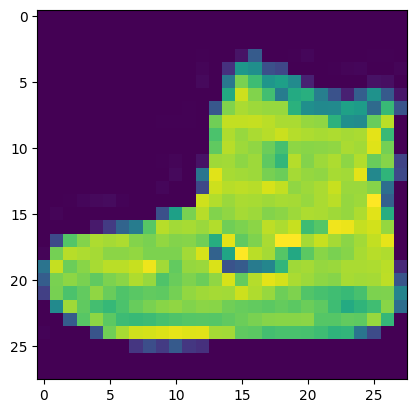

In [9]:
plt.imshow(train_images[0])
plt.show()

So this is a picture of a boot.

There are 10 classes in this data set.

```

class_name = ['T-shirt/top',

              'Pullover',

              'Dress',

              'Coat',

              'Sandal', '

              Shirt',

              'Sneaker',

              'Bag',

              'Ankle Boot']
```

In [10]:
# Lebel of the image above
print(train_labels[0])

9


In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
# Normalizing the pixel values to 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [15]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [16]:
train_images.shape

(60000, 28, 28, 1)

In [17]:
test_images.shape

(10000, 28, 28, 1)

So the reshaping added the channel value in the array.

### CNN

In [18]:
# Building a Convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model. add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add dense layers on top
model.add(layers.Flatten()) # It flattens the array into 1d
model.add(layers.Dense(64, activation='relu')) # 64 neurons and activation function is relu
model.add(layers.Dense(10, activation='softmax')) # 10 classes for output and no activation function as it is the output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This model will predict the images for all of the classes and give the best prediction as the output of the prediction.

In [19]:
# Compiling and train the model
import tensorflow.keras as keras

model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7489 - loss: 0.6946 - val_accuracy: 0.8722 - val_loss: 0.3637
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8794 - loss: 0.3347 - val_accuracy: 0.8827 - val_loss: 0.3220
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8976 - loss: 0.2806 - val_accuracy: 0.8934 - val_loss: 0.2982
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9084 - loss: 0.2458 - val_accuracy: 0.8951 - val_loss: 0.2870
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9188 - loss: 0.2185 - val_accuracy: 0.8980 - val_loss: 0.2836
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9272 - loss: 0.1959 - val_accuracy: 0.8941 - val_loss: 0.3064
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9352 - loss: 0.1768 - val_accuracy: 0.9029 - val_loss: 0.2916
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9402 - loss: 0.1600 - val_accura

### Model Evaluation

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8922 - loss: 0.3813
0.8921999931335449


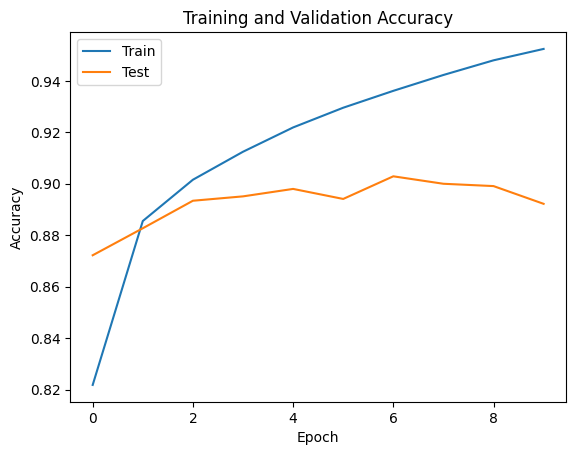

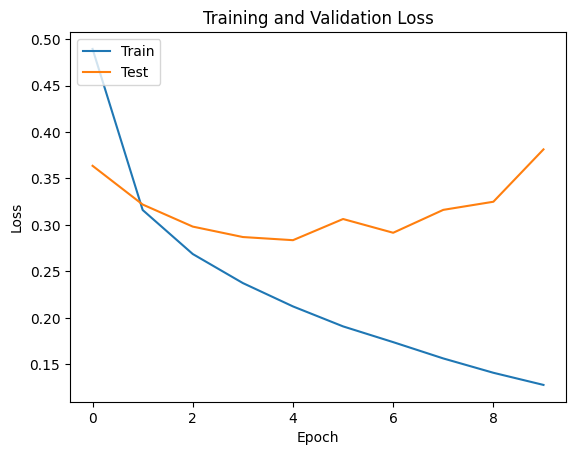

In [22]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(('Train', 'Test'), loc = 'upper left')
plt.show()

# plot test and validatin accuracy values
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(('Train', 'Test'), loc = 'upper left')
plt.show()

### Saving the model for the streamlit app

In [23]:
model.save('fashion_mnist_model.h5')

In [26]:
import tensorflow as tf

# Load the .h5 model
model = tf.keras.models.load_model('/content/fashion_mnist_model.h5')

In [27]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2.17.0
3.4.1


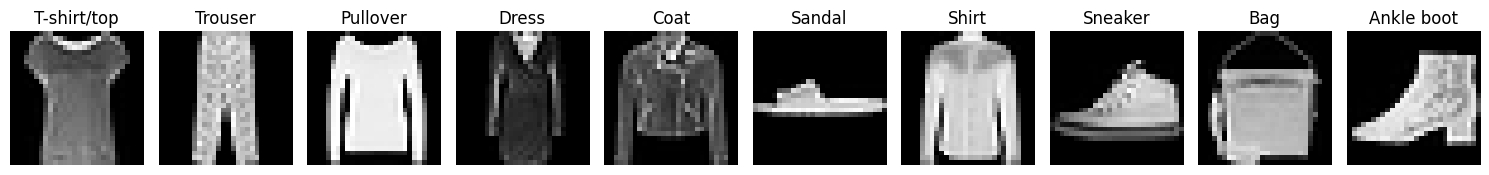

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# List of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a figure with subplots
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
axes = axes.flatten()

# Find and display the first image of each class
for i in range(10):
    # Find the first image index for class i
    index = np.where(train_labels == i)[0][100]

    # Plot the image
    axes[i].imshow(train_images[index], cmap='gray')
    axes[i].set_title(class_names[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()
